In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [4]:
a = 1.2
b = 0.8
x_0, x_N = 0, 1
y_0, y_N = 0, 1

def u(x,y):
    return y**2*np.sin(x) + x*np.exp(y) - 1

def f(x,y):
    return a*y**2*np.sin(x) - b*(2*np.sin(x) + x*np.exp(y))

def mygreed(Nx, Ny, x_0=0, x_N=1, y_0=0, y_N=1):
    return np.linspace(x_0,x_N,Nx), np.linspace(y_0,y_N,Ny)
  
def plot_3d(xm,ym,um,title = '',x_lable = 'x',y_lable = 'y',z_lable = 'z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, ym , um, rstride=25, cstride=25)
    plt.show()
    
def lusternik_max(A):
    eps = 0.00001
    N = A.shape[0]
    y_prev = np.random.uniform(0,1,N)
    y_prev = y_prev/np.linalg.norm(y_prev)
    y_curr = np.ones(N)
    itr = 0
    MAX_ITER = 1000000
    lmb_prev = 1
    lmb_curr = 0
    while(np.linalg.norm(y_curr - lmb_curr*y_prev)>eps and itr < MAX_ITER):
        lmb_prev = lmb_curr
        y_curr = A.dot(y_prev)
        lmb_curr = y_curr.dot(y_prev)
        y_prev[:] = y_curr/np.linalg.norm(y_curr)
        itr += 1
    return lmb_curr

def lusternik_min(A):
    k = np.linalg.norm( A, np.inf )
    return k - lusternik_max( A )    

def Nevyazka(U,f,a,b):
    max_nev = 0
    for i in range(1,N-1):
        for j in range(1,N-1):
            nev = abs(f(x[i],y[j]) + a*(U[i-1,j] - 2*U[i,j] + U[i+1,j])/(h**2) + 
                  + b*(U[i,j-1] -2*U[i,j] + U[i,j+1])/(h**2) )
            if nev > max_nev:
                max_nev = nev
    return max_nev
  
    
#successive over-relaxation
def SOR(N, eps, u = u, f = f, a=a, b=b, x_0=0, x_N=1, y_0=0, y_N=1):
    w = 2 / ( 1 + np.sin( np.pi / N ) )
    x, y  = mygreed(N,N)
    U_prev = np.zeros((N,N))
    U = np.zeros((N,N))
    U[0,:] = u(x_0,y[:])
    U[-1,:] = u(x_N,y[:])
    U[:,0] = u(x[:],y_0)
    U[:,-1] = u(x[:],y_N)
    itr = 0
    MAX_ITER = 100000
    
    while Nevyazka(U,f,a,b) > eps and itr < MAX_ITER :
        itr += 1
        U_prev = U.copy()
        for i in range(1,N-1):
            for j in range(1,N-1):
                U[i,j] = (1-w)*U[i,j] + w/(2*a+2*b)*( a*U[i-1,j] + a*U[i+1,j] + b*U[i,j-1] + b*U[i,j+1] + h**2*f(x[i],y[j]) )   

         
    return U.T



In [5]:
N  = 40
h = 1/N
x,y = mygreed(N,N)
xm, ym = np.meshgrid(x, y)

In [6]:
M = N*N
A = np.identity(M)*2*(a+b)
A[0,1] = - a
A[M-1,M-2] = -a
for i in range(1,M-1):
    A[i,i+1] = - a
    A[i,i-1] = - a
    if(i>=N):
        A[i-N,i] = - b
        A[i,i-N] = - b
A[M-1-N,M-1] = - b
A[M-1,M-1-N] = - b
A = M*A

In [ ]:
l_max = lusternik_max(A)
l_min = lusternik_min(A)
print(l_min, l_max)

<IPython.core.display.Javascript object>


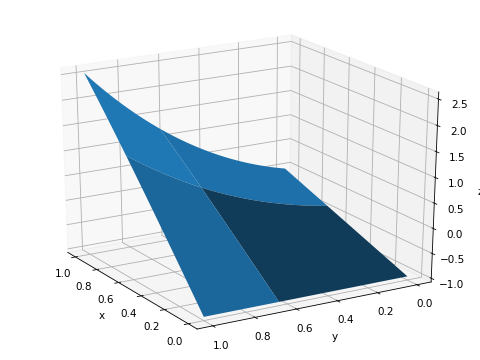

In [10]:
%matplotlib notebook
U = SOR(N, 0.0001)
plot_3d(xm, ym, U)

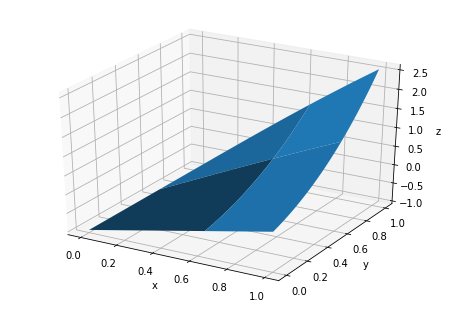

In [8]:
U_ex = u(xm,ym)
plot_3d(xm, ym, U_ex)

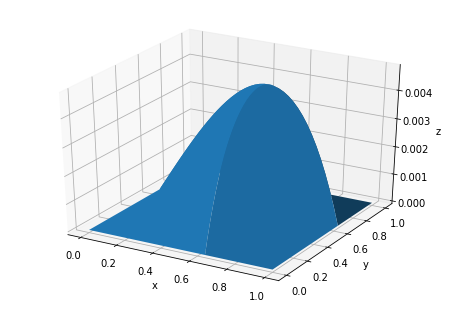

0.004788228049701582

In [9]:
err = abs(U - U_ex)
plot_3d(xm, ym, err)
err.max()

In [9]:
# Тест люстерника
A = np.array([[5,2,10],[1,2,1],[1,1,2]])    
print(lusternik_min(A), lusternik_max(A))

9.393373943325486 7.599915434791329
